In [240]:
from vega_datasets import data
from datetime import datetime
import pandas as pd
import seaborn as sns

In [2]:
df_temp = data.sf_temps()

In [3]:
df_temp.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df_temp.shape

(8759, 2)

In [5]:
df_temp.date = pd.to_datetime(df_temp.date, format='%a %Y-%m-%d %H:%M:%S')

In [7]:
df_temp['year'] = df_temp.date.dt.year
df_temp['month'] = df_temp.date.dt.month
df_temp['day'] = df_temp.date.dt.day
df_temp['weekday'] = df_temp.date.dt.day_name()
df_temp['month_name'] = df_temp.date.dt.month_name()
df_temp.head()

,temp,date,year,month,day,weekday,month_name
0,47.8,2010-01-01 00:00:00,2010,1,1,Friday,January
1,47.4,2010-01-01 01:00:00,2010,1,1,Friday,January
2,46.9,2010-01-01 02:00:00,2010,1,1,Friday,January
3,46.5,2010-01-01 03:00:00,2010,1,1,Friday,January
4,46.0,2010-01-01 04:00:00,2010,1,1,Friday,January


In [8]:
df_temp = df_temp.set_index('date').sort_index()

In [9]:
df_temp.head()

,temp,year,month,day,weekday,month_name
date,,,,,,
2010-01-01 00:00:00,47.8,2010,1,1,Friday,January
2010-01-01 01:00:00,47.4,2010,1,1,Friday,January
2010-01-01 02:00:00,46.9,2010,1,1,Friday,January
2010-01-01 03:00:00,46.5,2010,1,1,Friday,January
2010-01-01 04:00:00,46.0,2010,1,1,Friday,January


In [10]:
df_temp.resample('D').mean() # Every Day

,temp,year,month,day
date,,,,
2010-01-01,49.170833,2010,1,1
2010-01-02,49.304167,2010,1,2
2010-01-03,49.391667,2010,1,3
2010-01-04,49.445833,2010,1,4
2010-01-05,49.491667,2010,1,5
...,...,...,...,...
2010-12-27,48.991667,2010,12,27
2010-12-28,49.000000,2010,12,28
2010-12-29,49.012500,2010,12,29


In [11]:
df_temp.resample('D').mean().temp

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
                ...    
2010-12-27    48.991667
2010-12-28    49.000000
2010-12-29    49.012500
2010-12-30    49.012500
2010-12-31    49.116667
Freq: D, Name: temp, Length: 365, dtype: float64

# Exercise 1-1

### Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

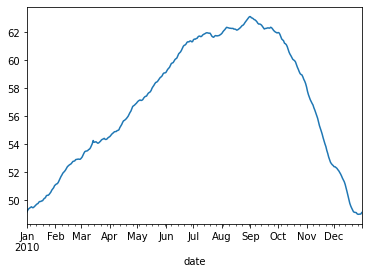

In [12]:
df_temp.resample('D').mean().temp.plot()

In [19]:
df_temp.resample('D').mean().temp.rolling(1)

Rolling [window=1,center=False,axis=0]

In [26]:
df_temp.resample('D').mean().temp.rolling(1).mean()

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
                ...    
2010-12-27    48.991667
2010-12-28    49.000000
2010-12-29    49.012500
2010-12-30    49.012500
2010-12-31    49.116667
Freq: D, Name: temp, Length: 365, dtype: float64

,temp,year,month,day,rolling_1
date,,,,,
2010-01-01,49.170833,2010,1,1,49.170833
2010-01-02,49.304167,2010,1,2,49.304167
2010-01-03,49.391667,2010,1,3,49.391667
2010-01-04,49.445833,2010,1,4,49.445833
2010-01-05,49.491667,2010,1,5,49.491667


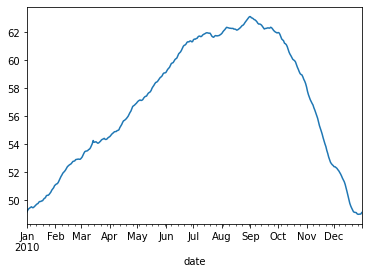

In [21]:
rolling_df = df_temp.resample('D').mean().assign(
    rolling_1=lambda df_temp: df_temp.temp.rolling(1).mean(),

)
rolling_df.rolling_1.plot()
rolling_df.head()

# Exercise 1-2

### Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

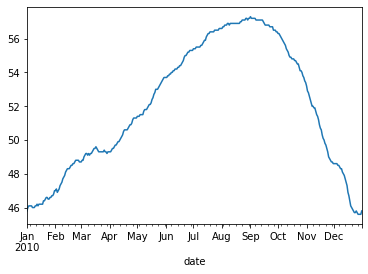

In [22]:
df_temp.resample('D').min().temp.plot()

# Exercise 1-3

### Write the code necessary to visualize the max temperature over time.

<AxesSubplot:xlabel='date'>

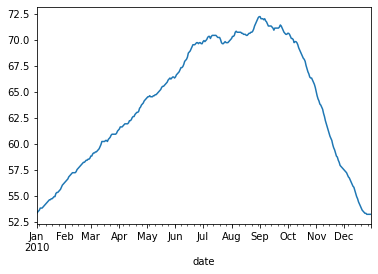

In [23]:
df_temp.resample('D').max().temp.plot()

# Exercise 1-4

### Which month is the coldest, on average?

<AxesSubplot:xlabel='date'>

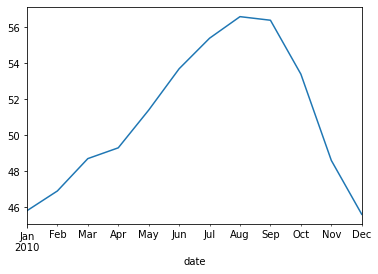

In [25]:
df_temp.resample('M').min().temp.plot()

In [27]:
df_temp.resample('M').min().temp.mean()

50.98333333333334

In [36]:
df_temp.resample('M').min().temp.rolling(1).mean()

date
2010-01-31    45.8
2010-02-28    46.9
2010-03-31    48.7
2010-04-30    49.3
2010-05-31    51.4
2010-06-30    53.7
2010-07-31    55.4
2010-08-31    56.6
2010-09-30    56.4
2010-10-31    53.4
2010-11-30    48.6
2010-12-31    45.6
Freq: M, Name: temp, dtype: float64

In [40]:
df_temp.resample('M').mean()

,temp,year,month,day
date,,,,
2010-01-31,49.984140,2010.0,1.0,16.000000
2010-02-28,52.243899,2010.0,2.0,14.500000
2010-03-31,53.956528,2010.0,3.0,16.002692
2010-04-30,55.633056,2010.0,4.0,15.500000
2010-05-31,57.970968,2010.0,5.0,16.000000
2010-06-30,60.444722,2010.0,6.0,15.500000
2010-07-31,61.765457,2010.0,7.0,16.000000
2010-08-31,62.405376,2010.0,8.0,16.000000
2010-09-30,62.487083,2010.0,9.0,15.500000


In [48]:
df_temp.resample('M').mean().temp.idxmin().month_name()

'January'

In [53]:
df_temp.resample('M').mean().temp.sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

In [46]:
df_temp[df_temp.index == df_temp.resample("M").mean().temp.idxmin()]

,temp,year,month,day,weekday,month_name
date,,,,,,
2010-01-31,49.4,2010,1,31,Sunday,January


In [54]:
df_temp[df_temp.index == df_temp.resample("M").mean().temp.idxmin()]['month_name']

date
2010-01-31    January
Name: month_name, dtype: object

# Exercise 5

### Which month has the highest average temperature?

<AxesSubplot:xlabel='date'>

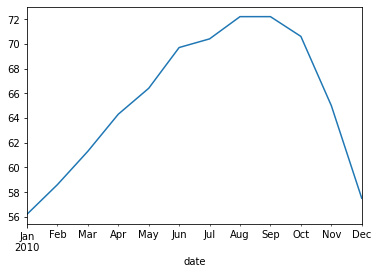

In [24]:
df_temp.resample('M').max().temp.plot()

In [31]:
df_temp.resample('M').max().temp.rolling(1).mean()

date
2010-01-31    56.2
2010-02-28    58.6
2010-03-31    61.3
2010-04-30    64.3
2010-05-31    66.4
2010-06-30    69.7
2010-07-31    70.4
2010-08-31    72.2
2010-09-30    72.2
2010-10-31    70.6
2010-11-30    65.0
2010-12-31    57.5
Freq: M, Name: temp, dtype: float64

In [55]:
df_temp.resample('M').mean().temp.idxmax().month_name()

'September'

In [58]:
df_temp[df_temp.index == df_temp.resample("M").mean().temp.idxmax()].index.month_name()[0]

'September'

# Exercise 6

### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

<AxesSubplot:xlabel='date'>

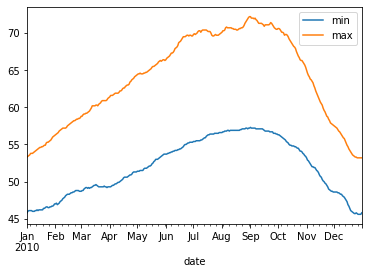

In [25]:
df_temp.resample('D').agg(['min','max']).temp.plot()

In [33]:
df_change_temp = df_temp.resample('D').agg(['min','max']).temp

In [34]:
df_change_temp.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [50]:
df_change_temp['range'] =  df_change_temp['max'] - df_change_temp['min']

<AxesSubplot:xlabel='date'>

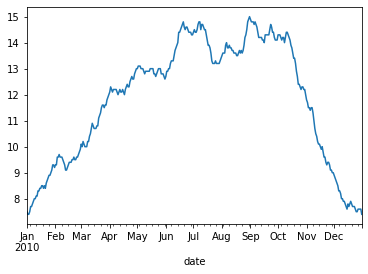

In [51]:
df_change_temp.range.plot()

In [61]:
df_change_temp.head()

,min,max,range
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [66]:
df_change_temp['range'].idxmax().month_name()

'August'

# Exercise 7

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

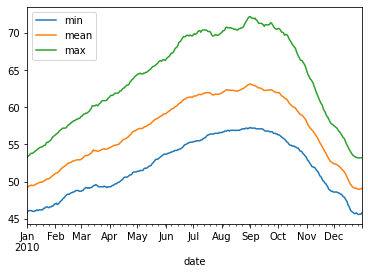

In [67]:
df_temp.resample('D').agg(['min','mean','max']).temp.plot()

# Exercise 2-1

Which year and month combination has the highest amount of precipitation?

In [75]:
df_seattle = data.seattle_weather()

In [76]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [77]:
df_seattle['year'] = df_seattle.date.dt.year
df_seattle['month'] = df_seattle.date.dt.month
df_seattle['day'] = df_seattle.date.dt.day
df_seattle['weekday'] = df_seattle.date.dt.day_name()
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,weekday
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,Sunday
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,Monday
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,Tuesday
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,Wednesday
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,Thursday


In [78]:
#df_temp.date = pd.to_datetime(df_temp.date, format='%Y-%m-%d %H:%M:%S')

df_seattle = df_seattle.set_index('date')

In [79]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,weekday
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,Sunday
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,Monday
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,Tuesday
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,Wednesday
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,Thursday


<AxesSubplot:xlabel='year,month'>

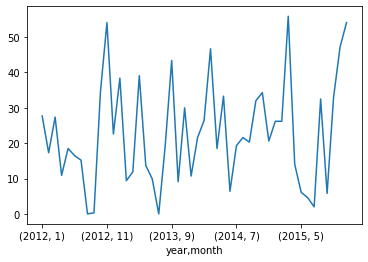

In [81]:
#df_seattle.resample('M')
#df_seattle.resample('Y')

df_seattle.groupby(['year', 'month']).precipitation.max().plot()

In [82]:
df_seattle.groupby(['year', 'month']).precipitation.max()

year  month
2012  1        27.7
      2        17.3
      3        27.4
      4        10.9
      5        18.5
      6        16.5
      7        15.2
      8         0.0
      9         0.3
      10       34.5
      11       54.1
      12       22.6
2013  1        38.4
      2         9.4
      3        11.9
      4        39.1
      5        13.7
      6         9.9
      7         0.0
      8        19.3
      9        43.4
      10        9.1
      11       30.0
      12       10.7
2014  1        21.6
      2        26.4
      3        46.7
      4        18.5
      5        33.3
      6         6.4
      7        19.3
      8        21.6
      9        20.3
      10       32.0
      11       34.3
      12       20.6
2015  1        26.2
      2        26.2
      3        55.9
      4        14.0
      5         6.1
      6         4.6
      7         2.0
      8        32.5
      9         5.8
      10       33.0
      11       47.2
      12       54.1
Name: precipitation, dtype: 

# Exercise 2-2

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

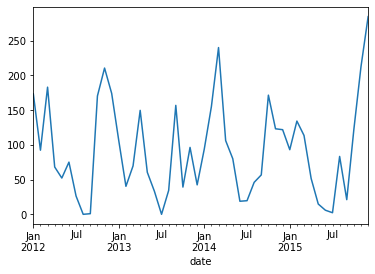

In [85]:
df_seattle.resample('M').sum().precipitation.plot()

In [ ]:
# 5 day averages (think rolling)

# Exercise 2-3

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

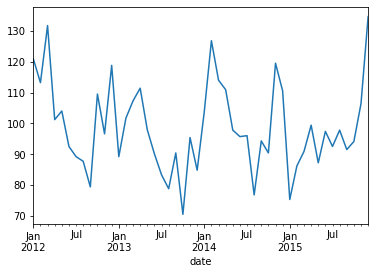

In [91]:
df_seattle.resample('M').sum().wind.plot()

# Exercise 2-4

Which year-month combination is the windiest?

<AxesSubplot:xlabel='year,month'>

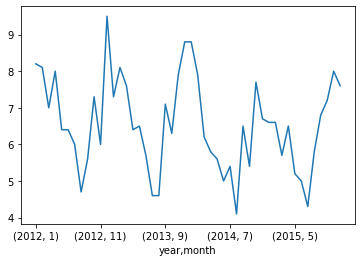

In [92]:
df_seattle.groupby(['year', 'month']).wind.max().plot()

In [93]:
df_seattle.groupby(['year', 'month']).wind.max()

year  month
2012  1        8.2
      2        8.1
      3        7.0
      4        8.0
      5        6.4
      6        6.4
      7        6.0
      8        4.7
      9        5.6
      10       7.3
      11       6.0
      12       9.5
2013  1        7.3
      2        8.1
      3        7.6
      4        6.4
      5        6.5
      6        5.7
      7        4.6
      8        4.6
      9        7.1
      10       6.3
      11       7.9
      12       8.8
2014  1        8.8
      2        7.9
      3        6.2
      4        5.8
      5        5.6
      6        5.0
      7        5.4
      8        4.1
      9        6.5
      10       5.4
      11       7.7
      12       6.7
2015  1        6.6
      2        6.6
      3        5.7
      4        6.5
      5        5.2
      6        5.0
      7        4.3
      8        5.8
      9        6.8
      10       7.2
      11       8.0
      12       7.6
Name: wind, dtype: float64

# Exercise 2-5

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [102]:
df_seattle[df_seattle.weather == 'sun'].resample('Y').count().weather.idxmax().year

2014

In [98]:
df_seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

# Exercise 2-6

In which month does it rain the most?

In [105]:
df_seattle[df_seattle.weather == 'rain'].resample('M').count().weather.idxmax().month_name()

'November'

# Exercise 2-7

Which month has the most number of days with a non-zero amount of precipitation?

In [106]:
df_seattle[df_seattle.precipitation != 0].resample('M').count().precipitation.idxmax().month_name()

'December'

# Exercise 3-1

In [219]:
df_flight = data.flights_20k()
df_flight.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [220]:
df_flight.shape

(20000, 5)

In [157]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [221]:
df_flight['year'] = df_flight.date.dt.year
df_flight['month'] = df_flight.date.dt.month
df_flight['day'] = df_flight.date.dt.day
df_flight['weekday'] = df_flight.date.dt.day_name()
df_flight['hour'] = df_flight.date.dt.hour
df_flight.head()

,date,delay,distance,origin,destination,year,month,day,weekday,hour
0,2001-01-13 14:56:00,32,417,SAN,SJC,2001,1,13,Saturday,14
1,2001-01-31 16:40:00,-5,1093,FLL,ISP,2001,1,31,Wednesday,16
2,2001-02-11 18:39:00,3,293,LBB,DAL,2001,2,11,Sunday,18
3,2001-01-10 21:00:00,-15,550,MSY,MCO,2001,1,10,Wednesday,21
4,2001-03-30 21:45:00,-2,229,STL,IND,2001,3,30,Friday,21


In [222]:
#df_temp.date = pd.to_datetime(df_temp.date, format='%Y-%m-%d %H:%M:%S')

df_flight = df_flight.set_index('date')

In [223]:
df_flight.head()

,delay,distance,origin,destination,year,month,day,weekday,hour
date,,,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,2001,1,13,Saturday,14
2001-01-31 16:40:00,-5,1093,FLL,ISP,2001,1,31,Wednesday,16
2001-02-11 18:39:00,3,293,LBB,DAL,2001,2,11,Sunday,18
2001-01-10 21:00:00,-15,550,MSY,MCO,2001,1,10,Wednesday,21
2001-03-30 21:45:00,-2,229,STL,IND,2001,3,30,Friday,21


### Convert any negative delays to 0.

In [224]:
%timeit df_flight['delay'] = df_flight['delay'].apply(lambda x : x if x > 0 else 0)

10.7 ms ± 601 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [225]:
df_flight.head()

,delay,distance,origin,destination,year,month,day,weekday,hour
date,,,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,2001,1,13,Saturday,14
2001-01-31 16:40:00,0,1093,FLL,ISP,2001,1,31,Wednesday,16
2001-02-11 18:39:00,3,293,LBB,DAL,2001,2,11,Sunday,18
2001-01-10 21:00:00,0,550,MSY,MCO,2001,1,10,Wednesday,21
2001-03-30 21:45:00,0,229,STL,IND,2001,3,30,Friday,21


# Exercise 3-2

Which hour of the day has the highest average delay?

<AxesSubplot:xlabel='hour,day'>

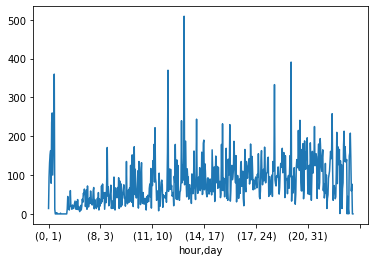

In [165]:
df_flight.groupby(['hour', 'day']).delay.max().plot()

In [170]:
df_flight.groupby(['hour', 'day']).delay.max().idxmax()

(13, 9)

In [228]:
df_flight.groupby('weekday').delay.mean().idxmax()

'Friday'

# Exercise 3-3

Does the day of the week make a difference in the delay amount?

In [172]:
df_flight['shift(1)'] = df_flight.delay.shift(1)

In [178]:
df_flight = df_flight.fillna(0)

In [188]:
df_flight.head()

,delay,distance,origin,destination,year,month,day,weekday,hour,shift(1)
date,,,,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,2001,1,13,Saturday,14,0.0
2001-01-31 16:40:00,0,1093,FLL,ISP,2001,1,31,Wednesday,16,32.0
2001-02-11 18:39:00,3,293,LBB,DAL,2001,2,11,Sunday,18,0.0
2001-01-10 21:00:00,0,550,MSY,MCO,2001,1,10,Wednesday,21,3.0
2001-03-30 21:45:00,0,229,STL,IND,2001,3,30,Friday,21,0.0


In [174]:
df_flight.shift(1).max()

delay        509.0
distance    2298.0
year        2001.0
month          3.0
day           31.0
hour          23.0
shift(1)     509.0
dtype: float64

<AxesSubplot:xlabel='day,hour'>

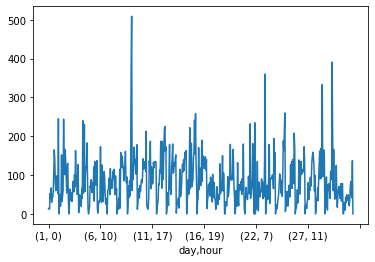

In [197]:
df_flight.groupby(['day', 'hour']).delay.max().plot()

In [195]:
df_flight.groupby(['day', 'hour']).shift(1).max()

delay        509.0
distance    2298.0
year        2001.0
month          3.0
shift(1)     509.0
dtype: float64

# Exercise 3-4

Does the month make a difference in the delay amount?

<AxesSubplot:xlabel='month,hour'>

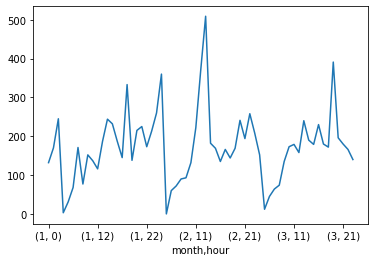

In [198]:
df_flight.groupby(['month', 'hour']).delay.max().plot()

In [205]:
df_flight.groupby(['month', 'hour']).delay.max()

month  hour
1      0       132
       1       170
       3       245
       5         3
       6        31
              ... 
3      19      391
       20      196
       21      180
       22      166
       23      140
Name: delay, Length: 63, dtype: int64

In [229]:
df_flight.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

# Bonus

In [230]:
df_iowa = data.iowa_electricity()
df_iowa.head()


,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [210]:
df_iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [231]:
df_iowa = df_iowa.set_index('year')

### For each row, calculate the percentage of the year's total that energy source provided.

In [232]:
df_iowa.net_generation.resample('YS').sum()

year
2001-01-01    40651
2002-01-01    42528
2003-01-01    42107
2004-01-01    43236
2005-01-01    44145
2006-01-01    45473
2007-01-01    49778
2008-01-01    53086
2009-01-01    51859
2010-01-01    57509
2011-01-01    56371
2012-01-01    56675
2013-01-01    56670
2014-01-01    56854
2015-01-01    56653
2016-01-01    54381
2017-01-01    56476
Freq: AS-JAN, Name: net_generation, dtype: int64

In [234]:
# map the resampled data above (total by year) to the original df

df_iowa['year_total'] = df_iowa.index.map(df_iowa.net_generation.resample('YS').sum())

In [236]:
# For each row, calculate the percentage of the year's total that energy source provided.

df_iowa['percentage'] = df_iowa.net_generation/df_iowa.year_total


In [238]:
df1 = df_iowa.reset_index()

<AxesSubplot:xlabel='year', ylabel='net_generation'>

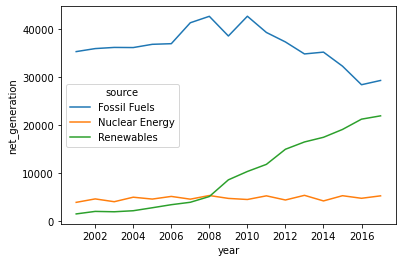

In [241]:
# Lineplot of generation over time, color by source:

sns.lineplot(data = df1, x = 'year', y = 'net_generation', hue = 'source')

In [243]:
# Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

# lets make a new column called 'c_year' which is just the year

df_iowa['c_year'] = df_iowa.index.year

In [245]:
# use pivot_table to have years as columns:

df_pivot = df_iowa.pivot_table(index = ['source'], columns= 'c_year', values = 'net_generation' )

<AxesSubplot:xlabel='year'>

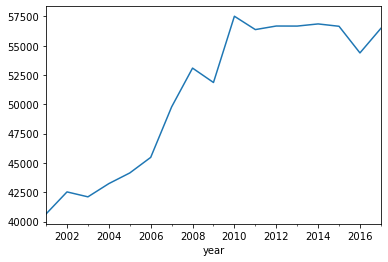

In [246]:
# Is the total generation increasing over time?

df_iowa.net_generation.resample('YS').sum().plot()

In [247]:
# lets normalize the dataframe (columnwise):

cols = list(df_pivot.columns)
df_pivot[cols] = df_pivot[cols] / df_pivot[cols].sum()

<AxesSubplot:xlabel='c_year'>

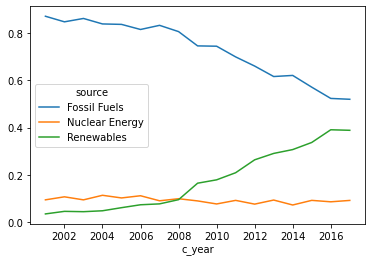

In [248]:
df_pivot.T.plot()

#### Takeaways:

- Fossil fuel use (as % of total) is decreasing.
- Nuclear energy is flat
- Renewables use is increasing